#### Optimization Final

In [1]:
using JuMP, CSV, DataFrames

#### Value Stocks

In [2]:
returns = DataFrame(CSV.File("tech_value_returns.csv",header = true))
cov = DataFrame(CSV.File("tech_value_cov.csv",header = true))

Row,APP,DLO,FTNT,IMXI,ITRN,KARO,LYTS,NVEC,PSN,SATS
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00173792,0.000227228,0.00014808,0.000128504,5.96798e-5,2.9531e-5,1.56083e-5,0.000122094,2.76216e-5,6.27584e-5
2,0.000227228,0.00175013,0.000137151,0.000102515,9.07362e-5,5.74328e-5,9.11468e-5,-3.85067e-7,2.13334e-5,6.0258e-5
3,0.00014808,0.000137151,0.000646589,-7.74696e-6,2.3584e-5,2.7283e-6,3.99033e-5,8.74461e-5,6.62848e-6,3.98415e-5
4,0.000128504,0.000102515,-7.74696e-6,0.000569619,4.8669e-5,5.87457e-5,7.62068e-5,2.33958e-5,-3.3176e-5,3.72923e-5
5,5.96798e-5,9.07362e-5,2.3584e-5,4.8669e-5,0.000273819,9.374e-6,4.33308e-5,6.27405e-5,1.42711e-5,1.32237e-5
6,2.9531e-5,5.74328e-5,2.7283e-6,5.87457e-5,9.374e-6,0.000857993,-3.60657e-6,-1.562e-5,3.56677e-6,6.51146e-5
7,1.56083e-5,9.11468e-5,3.99033e-5,7.62068e-5,4.33308e-5,-3.60657e-6,0.00088095,0.000111918,3.87949e-5,0.000119049
8,0.000122094,-3.85067e-7,8.74461e-5,2.33958e-5,6.27405e-5,-1.562e-5,0.000111918,0.000739774,-8.01222e-6,7.8791e-5
9,2.76216e-5,2.13334e-5,6.62848e-6,-3.3176e-5,1.42711e-5,3.56677e-6,3.87949e-5,-8.01222e-6,0.00020749,5.27204e-5


In [3]:
returns

Row,0
,Float64
1,1.5496
2,0.347586
3,0.269401
4,-0.0251218
5,0.317736
6,0.183606
7,0.266608
8,0.342179
9,0.332646


### Without Short

In [4]:
using Ipopt

ER = returns[:, 1]  # Assuming expected returns are in the first column
C = Matrix(cov[:, 1:end])  # Assuming the first column is labels and the rest are the covariance matrix

n, _ = size(C)

ERp = collect(0.00:0.01:0.8)

result = DataFrame(SDp=NaN,ERp=NaN,x1=NaN,x2=NaN,x3=NaN,x4=NaN,x5=NaN,x6=NaN,x7=NaN,x8=NaN,x9=NaN,x10=NaN)

for k in 1:length(ERp)
    m = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))
    @variable(m, x[1:n] >= 0)
    @NLobjective(m, Min, sum(x[i] * C[i, j] * x[j] for i in 1:n for j in 1:n))
    @NLconstraint(m, sum(ER[i] * x[i] for i in 1:n) == ERp[k])
    @NLconstraint(m, sum(x[i] for i in 1:n) == 1)
    optimize!(m)

    # Create a new row as a tuple
    new_row = (sqrt(objective_value(m)), ERp[k], [round(value(x[i]),digits=4) for i in 1:n]...)
    push!(result, new_row)
end

result


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



Row,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0213233,0.0,0.0,0.0,0.0,0.8732,0.0,0.051,0.0,0.0,0.0,0.0758
3,0.0204586,0.01,0.0,0.0,0.0003,0.824,0.0,0.0834,0.0,0.0,0.0,0.0922
4,0.0196681,0.02,0.0,0.0,0.017,0.7824,0.0,0.1009,0.0,0.0,0.0,0.0997
5,0.0189168,0.03,0.0,0.0,0.0426,0.7448,0.0,0.1101,0.0001,0.0,0.0,0.1024
6,0.0182049,0.04,0.0,0.0,0.0683,0.7072,0.0,0.1194,0.0,0.0,0.0,0.105
7,0.0175375,0.05,0.0,0.0,0.0897,0.6718,0.0,0.1266,0.0003,0.0,0.0052,0.1065
8,0.016894,0.06,0.0,0.0,0.0932,0.6453,0.0,0.1251,0.0008,0.0,0.0326,0.1029
9,0.016264,0.07,0.0,0.0,0.0964,0.6189,0.0001,0.1236,0.0025,0.0,0.0594,0.0992


sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


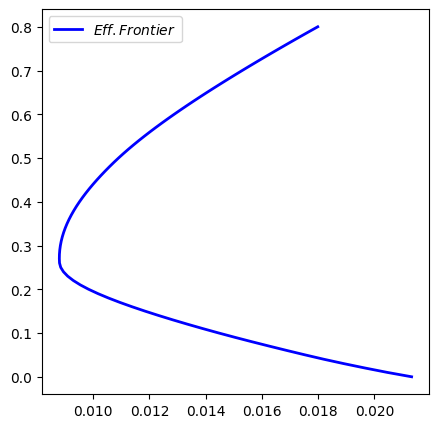

In [5]:
using PyPlot

# Assuming `result` is a previously defined matrix or DataFrame
# where `result[:, :SDp]` represents the x-axis data and `result[:, :ERp]` represents the y-axis data
# Convert data to percentages
x_data = result[:, :SDp]  # Replace `:SDp` with the appropriate column index or name for your x-axis data
y_data = result[:, :ERp]  # Replace `:ERp` with the appropriate column index or name for your y-axis data

# Set the figure size
figure(figsize=(5, 5))  # Width and height in inches

# Plot the efficient frontier
plot(x_data, y_data, color="blue", linewidth=2, label=L"Eff. Frontier")

# Adding legend to the top left
legend(loc="upper left")

# If you want to use LaTeX strings, PyPlot should automatically support them if you have LaTeX installed.
# Otherwise, you can use a string directly for the label, like "Eff. Frontier" if LaTeX is not working.

# Show the plot
show()

In [6]:
# CSV.write("tech_value_noshort.csv", result, delim = ';')

#### With Short

In [7]:
using Ipopt

ER = returns[:, 1]  # Assuming expected returns are in the first column
C = Matrix(cov[:, 1:end])  # Assuming the first column is labels and the rest are the covariance matrix

n, _ = size(C)

ERp = collect(0.00:0.01:0.8)

result = DataFrame(SDp=NaN,ERp=NaN,x1=NaN,x2=NaN,x3=NaN,x4=NaN,x5=NaN,x6=NaN,x7=NaN,x8=NaN,x9=NaN,x10=NaN)

for k in 1:length(ERp)
    m = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))
    @variable(m, x[1:n])
    @NLobjective(m, Min, sum(x[i] * C[i, j] * x[j] for i in 1:n for j in 1:n))
    @NLconstraint(m, sum(ER[i] * x[i] for i in 1:n) == ERp[k])
    @NLconstraint(m, sum(x[i] for i in 1:n) == 1)
    optimize!(m)

    # Create a new row as a tuple
    new_row = (sqrt(objective_value(m)), ERp[k], [round(value(x[i]),digits=4) for i in 1:n]...)
    push!(result, new_row)
end

result

Row,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0116431,0.0,-0.1662,0.0108,0.1353,0.2713,0.176,0.0926,0.0228,0.0692,0.3423,0.0459
3,0.0114606,0.01,-0.1598,0.0107,0.1338,0.2657,0.1771,0.092,0.0232,0.0692,0.343,0.0451
4,0.0112823,0.02,-0.1535,0.0107,0.1322,0.2602,0.1781,0.0914,0.0236,0.0692,0.3437,0.0443
5,0.0111082,0.03,-0.1471,0.0106,0.1307,0.2546,0.1792,0.0908,0.0241,0.0692,0.3444,0.0436
6,0.0109386,0.04,-0.1408,0.0105,0.1291,0.2491,0.1803,0.0902,0.0245,0.0692,0.3452,0.0428
7,0.0107736,0.05,-0.1344,0.0104,0.1276,0.2435,0.1813,0.0896,0.0249,0.0692,0.3459,0.042
8,0.0106136,0.06,-0.128,0.0104,0.126,0.238,0.1824,0.089,0.0253,0.0692,0.3466,0.0412
9,0.0104586,0.07,-0.1217,0.0103,0.1245,0.2324,0.1834,0.0884,0.0258,0.0692,0.3473,0.0404


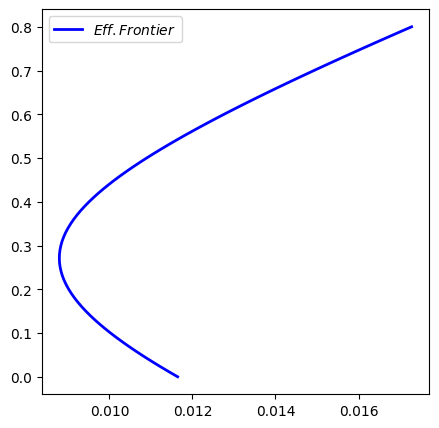

In [8]:
using PyPlot

# Assuming `result` is a previously defined matrix or DataFrame
# where `result[:, :SDp]` represents the x-axis data and `result[:, :ERp]` represents the y-axis data
# Convert data to percentages
x_data = result[:, :SDp]  # Replace `:SDp` with the appropriate column index or name for your x-axis data
y_data = result[:, :ERp]  # Replace `:ERp` with the appropriate column index or name for your y-axis data

# Set the figure size
figure(figsize=(5, 5))  # Width and height in inches

# Plot the efficient frontier
plot(x_data, y_data, color="blue", linewidth=2, label=L"Eff. Frontier")

# Adding legend to the top left
legend(loc="upper left")

# If you want to use LaTeX strings, PyPlot should automatically support them if you have LaTeX installed.
# Otherwise, you can use a string directly for the label, like "Eff. Frontier" if LaTeX is not working.

# Show the plot
show()

In [9]:
# CSV.write("tech_value_short.csv", result, delim = ';')

#### Growth Stocks

In [2]:
returns = DataFrame(CSV.File("tech_growth_returns.csv",header = true))
cov = DataFrame(CSV.File("tech_growth_cov.csv",header = true))

Row,CSPI,CXM,DUOL,ENFN,INTC,LDOS,MLAB,PAY,SMCI,SPLK
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00197688,4.06941e-5,0.000252712,4.71521e-5,8.67087e-5,4.76922e-5,-0.000149012,1.85914e-5,1.01696e-5,2.94957e-5
2,4.06941e-5,0.00102587,0.000255225,0.000150307,0.000127379,5.53915e-5,4.9986e-5,0.000169291,0.000160964,0.000150949
3,0.000252712,0.000255225,0.00132831,0.000117161,0.00020361,7.13547e-5,5.1062e-5,0.000146927,0.000239417,0.000188214
4,4.71521e-5,0.000150307,0.000117161,0.000858717,0.000121614,5.23772e-5,0.000173758,6.58124e-5,0.000129991,6.34552e-5
5,8.67087e-5,0.000127379,0.00020361,0.000121614,0.000586419,4.31435e-5,0.000114531,6.33381e-5,0.00024306,0.000109726
6,4.76922e-5,5.53915e-5,7.13547e-5,5.23772e-5,4.31435e-5,0.000265358,6.7662e-5,8.42003e-5,4.58431e-5,3.22541e-5
7,-0.000149012,4.9986e-5,5.1062e-5,0.000173758,0.000114531,6.7662e-5,0.000806164,0.000204328,8.81008e-5,7.34695e-5
8,1.85914e-5,0.000169291,0.000146927,6.58124e-5,6.33381e-5,8.42003e-5,0.000204328,0.00122609,9.88562e-5,8.65553e-5
9,1.01696e-5,0.000160964,0.000239417,0.000129991,0.00024306,4.58431e-5,8.81008e-5,9.88562e-5,0.00223204,0.000123096


In [3]:
returns

Row,0
,Float64
1,0.990331
2,0.53527
3,1.33315
4,0.108351
5,0.744988
6,0.0786391
7,-0.357913
8,0.955397
9,1.5302


### Without Short

In [6]:
using Ipopt

ER = returns[:, 1]  # Assuming expected returns are in the first column
C = Matrix(cov[:, 1:end])  # Assuming the first column is labels and the rest are the covariance matrix

n, _ = size(C)

ERp = collect(0.00:0.01:1.4)

result = DataFrame(SDp=NaN,ERp=NaN,x1=NaN,x2=NaN,x3=NaN,x4=NaN,x5=NaN,x6=NaN,x7=NaN,x8=NaN,x9=NaN,x10=NaN)

for k in 1:length(ERp)
    m = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))
    @variable(m, x[1:n] >= 0)
    @NLobjective(m, Min, sum(x[i] * C[i, j] * x[j] for i in 1:n for j in 1:n))
    @NLconstraint(m, sum(ER[i] * x[i] for i in 1:n) == ERp[k])
    @NLconstraint(m, sum(x[i] for i in 1:n) == 1)
    optimize!(m)

    # Create a new row as a tuple
    new_row = (sqrt(objective_value(m)), ERp[k], [round(value(x[i]),digits=4) for i in 1:n]...)
    push!(result, new_row)
end

result

Row,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0139716,0.0,0.0012,0.0211,0.0,0.1088,0.0,0.5811,0.2548,0.0,0.0,0.0329
3,0.013831,0.01,0.0033,0.0235,0.0,0.1082,0.0,0.5763,0.2483,0.0,0.0,0.0403
4,0.0136953,0.02,0.0061,0.0256,0.0,0.1075,0.0,0.5713,0.2423,0.0,0.0,0.0472
5,0.0135647,0.03,0.0089,0.0278,0.0,0.1067,0.0,0.5663,0.2363,0.0,0.0,0.0539
6,0.0134393,0.04,0.0118,0.0299,0.0,0.106,0.0001,0.5612,0.2304,0.0,0.0,0.0607
7,0.0133192,0.05,0.0147,0.0321,0.0,0.1052,0.0001,0.5561,0.2244,0.0,0.0,0.0674
8,0.0132047,0.06,0.0174,0.0341,0.0,0.1044,0.0007,0.551,0.2185,0.0,0.0,0.0738
9,0.0130954,0.07,0.0198,0.0357,0.0,0.1034,0.0032,0.5458,0.2129,0.0,0.0,0.0792


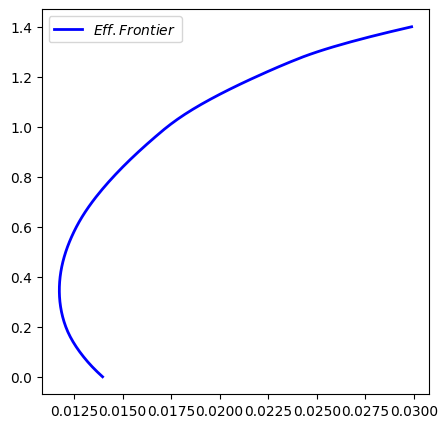

In [7]:
using PyPlot

# Assuming `result` is a previously defined matrix or DataFrame
# where `result[:, :SDp]` represents the x-axis data and `result[:, :ERp]` represents the y-axis data
# Convert data to percentages
x_data = result[:, :SDp]  # Replace `:SDp` with the appropriate column index or name for your x-axis data
y_data = result[:, :ERp]  # Replace `:ERp` with the appropriate column index or name for your y-axis data

# Set the figure size
figure(figsize=(5, 5))  # Width and height in inches

# Plot the efficient frontier
plot(x_data, y_data, color="blue", linewidth=2, label=L"Eff. Frontier")

# Adding legend to the top left
legend(loc="upper left")

# If you want to use LaTeX strings, PyPlot should automatically support them if you have LaTeX installed.
# Otherwise, you can use a string directly for the label, like "Eff. Frontier" if LaTeX is not working.

# Show the plot
show()

In [8]:
CSV.write("tech_growth_noshort.csv", result, delim = ';')

"tech_growth_noshort.csv"

#### With Short

In [15]:
using Ipopt

ER = returns[:, 1]  # Assuming expected returns are in the first column
C = Matrix(cov[:, 1:end])  # Assuming the first column is labels and the rest are the covariance matrix

n, _ = size(C)

ERp = collect(0.00:0.01:0.8)

result = DataFrame(SDp=NaN,ERp=NaN,x1=NaN,x2=NaN,x3=NaN,x4=NaN,x5=NaN,x6=NaN,x7=NaN,x8=NaN,x9=NaN,x10=NaN)

for k in 1:length(ERp)
    m = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))
    @variable(m, x[1:n])
    @NLobjective(m, Min, sum(x[i] * C[i, j] * x[j] for i in 1:n for j in 1:n))
    @NLconstraint(m, sum(ER[i] * x[i] for i in 1:n) == ERp[k])
    @NLconstraint(m, sum(x[i] for i in 1:n) == 1)
    optimize!(m)

    # Create a new row as a tuple
    new_row = (sqrt(objective_value(m)), ERp[k], [round(value(x[i]),digits=4) for i in 1:n]...)
    push!(result, new_row)
end

result

Row,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0133341,0.0,0.0347,0.0584,-0.0619,0.1052,0.0535,0.5545,0.2025,-0.0318,-0.0335,0.1184
3,0.0132487,0.01,0.0353,0.0581,-0.0599,0.1043,0.0552,0.5503,0.1992,-0.0298,-0.032,0.1193
4,0.0131652,0.02,0.0359,0.0578,-0.0579,0.1033,0.0569,0.5461,0.1958,-0.0277,-0.0305,0.1203
5,0.0130838,0.03,0.0365,0.0575,-0.056,0.1024,0.0586,0.5419,0.1924,-0.0256,-0.029,0.1212
6,0.0130044,0.04,0.037,0.0572,-0.054,0.1015,0.0603,0.5377,0.1891,-0.0235,-0.0274,0.1222
7,0.0129271,0.05,0.0376,0.0569,-0.0521,0.1006,0.062,0.5335,0.1857,-0.0215,-0.0259,0.1232
8,0.0128519,0.06,0.0382,0.0566,-0.0501,0.0996,0.0636,0.5293,0.1823,-0.0194,-0.0244,0.1241
9,0.0127789,0.07,0.0388,0.0563,-0.0482,0.0987,0.0653,0.5251,0.1789,-0.0173,-0.0229,0.1251


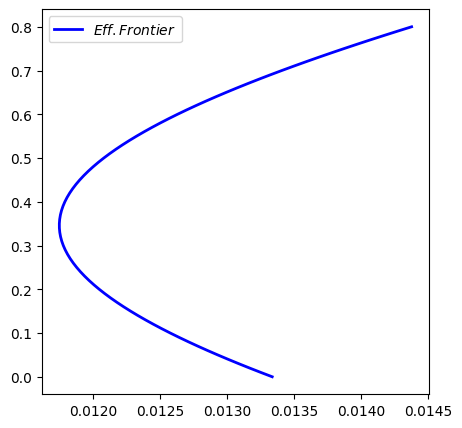

In [16]:
using PyPlot

# Assuming `result` is a previously defined matrix or DataFrame
# where `result[:, :SDp]` represents the x-axis data and `result[:, :ERp]` represents the y-axis data
# Convert data to percentages
x_data = result[:, :SDp]  # Replace `:SDp` with the appropriate column index or name for your x-axis data
y_data = result[:, :ERp]  # Replace `:ERp` with the appropriate column index or name for your y-axis data

# Set the figure size
figure(figsize=(5, 5))  # Width and height in inches

# Plot the efficient frontier
plot(x_data, y_data, color="blue", linewidth=2, label=L"Eff. Frontier")

# Adding legend to the top left
legend(loc="upper left")

# If you want to use LaTeX strings, PyPlot should automatically support them if you have LaTeX installed.
# Otherwise, you can use a string directly for the label, like "Eff. Frontier" if LaTeX is not working.

# Show the plot
show()

In [17]:
# CSV.write("tech_growth_short.csv", result, delim = ';')